In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import\
DecisionTreeClassifier as DT
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoLars

In [2]:
#df['hammer_price'] = None
#split_values = df['estimated_price'].str.split('USD', n=1, expand=True)
#df['estimated_price'] = split_values[0].str.strip()
#df['hammer_price'] = split_values[1].str.strip()
#df

In [3]:
import unidecode

In [4]:
# pdf scanner
import PyPDF2
import pdfminer
# arrays
import pandas as pd
import numpy as np
# os
import os
# NLP
    # regex
import re
    # unicode
import unidecode

In [5]:
# using as a whole pdf because it removes the line breaks \n

# importing required modules
bodies = []

# creating a pdf file object
pdfFileObj = open('./data-2.pdf', 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfReader(pdfFileObj)

# printing number of pages in pdf file
num_pages = len(pdfReader.pages)
#print(f"Number of pages: {num_pages}")

    # loop through all pages and extract text
for page_num in range(num_pages):
    pageObj = pdfReader.pages[page_num]
    text = pageObj.extract_text()
    bodies.append(text)
    #print(f"Page {page_num+1}:\ndata.pdf")
    # validate the process body of text is correct format
    #if type(text) is str:
        #print('Successfully pulled text from page.\n')
    #else:
        #print('Failed to pull text.')
# closing the pdf file object
pdfFileObj.close()

In [6]:
# decoding letters with accents into regular letters & removing character symbols
body_clean = []
for body in bodies:
    body = unidecode.unidecode(body)
    # removing the title of pdf from the body of text
    body = body.replace('Price Database31 October 2023','')
    body_clean.append(body)

In [7]:
# separating each entry by artist name
names = ['Zhang Daqian', 'Andy Warhol', 'Banksy', 'Salvador Dali','Marc Chagall','Pablo Picasso',
         'Rembrandt van Rijn','KAWS','Leonard Tsuguharu Foujita','Yayoi Kusama']
# container for all entries
new_body = []
# container for each artist that has multiple names in the entry
banksy_clean = []
marc_clean = []
pablo_clean = []
rembrandt_clean = []
dali_clean = []
for body in body_clean:
    for name in names:

        # isolating the entries that contain multiple counts of name in entry
            # the text in the if statement is the combined text where the name is repeated
            # these varie between title of piece or within the lot description

        # Banksy / KAWS
        if name == 'Banksy' or 'KAWS':
            if 'Only Banksy' in body:
                banksy_clean.append(body)
            elif 'Banksy and 21st Century Editions' in body:
                banksy_clean.append(body)

        # Marc Chagell
        if name == 'Marc Chagall':
            if 'Marc Chagall, Colour of Life' in body:
                marc_clean.append(body)
        # Dali
        if name == 'Salvador Dali':
            if 'After Salvador Dali' in body:
                dali_clean.append(body)
            elif 'SALVADOR DALI\' "Genesis"' in body:
                dali_clean.append(body)
            elif 'Currier & Ives as Interpreted by Salvador Dali' in body:
                dali_clean.append(body)
        # Picasso
        if name == 'Pablo Picasso':
            if 'After Pablo Picasso' in body:
                pablo_clean.append(body)
        # Rembrandt
        if name == 'Rembrandt van Rijn':
            if 'School of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Circle of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Studio of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Follower of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)

        # All other values that do not have repeated names
        else:
            entries = body.split(f"{name}")[1:]
        for entry in entries:
            entry = entry.strip()
            # adding an additional space back in between the name and piece_name
            a = ''.join([name+' ',entry])
            a = a.replace('\x00','-')
            new_body.append(a)
            #print(f"{name}")
            #print(a)
            #print("="*30)

In [8]:
# Removing entries from new_body that do not have complete data
new_body = [body for body in new_body if len(body) >= 130]

In [9]:
# cleaning duplicates within new_body
print(len(new_body))
new_body = list(set(new_body))
print(len(new_body))

1028
1028


In [10]:
# removing duplicates
banksy_clean = list(set(banksy_clean))

In [11]:
banksy_ = []
for i in banksy_clean:
    # splitting by new line
    i.split('\n')
    # adding space after artist name for ease of regex
    i = i.replace('Banksy','Banksy ')
    # removing double spaces
    i = i.replace('  ', ' ')
    banksy_.append(i)

In [12]:
# cleaned banksy entries with multiple appearances of names
#banksy_

In [13]:
# removing duplicates
rembrandt_clean = list(set(rembrandt_clean))

In [14]:
rembrandt_ = []
for i in rembrandt_clean:
    # splitting by new line
    i.split('\n')
    # adding space after artist name for ease of regex
    i = i.replace('Rembrandt','Rembrandt ')
    # removing double spaces
    i = i.replace('  ', ' ')
    rembrandt_.append(i)

In [15]:
# cleaned rembrandt entries with multiple appearances of names
#rembrandt_

In [16]:
marc_ = []
for i in marc_clean:
    # splitting by new line
    i.split('\n')
    # adding space after artist name for ease of regex
    i = i.replace('Marc Chagall','Marc Chagall ')
    # removing double spaces
    i = i.replace('  ', ' ')
    marc_.append(i)

In [17]:
# cleaned marc chagall entries with multiple appearances of names
#marc_

In [18]:
pablo_ = []
for i in pablo_clean:
    # splitting by new line
    i.split('\n')
    # adding space after artist name for ease of regex
    i = i.replace('Pablo Picasso','Pablo Picasso ')
    # removing double spaces
    i = i.replace('  ', ' ')
    pablo_.append(i)

In [19]:
# cleaned pablo picasso entries with multiple appearances of names
#pablo_

In [20]:
dali_ = []
for i in dali_clean:
    # splitting by new line
    i.split('\n')
    # adding space after artist name for ease of regex
    i = i.replace('Salvador Dali','Salvador Dali ')
    # removing double spaces
    i = i.replace('  ', ' ')
    dali_.append(i)

In [21]:
#dali_

In [22]:
len(new_body)

1028

In [23]:
add_ins = dali_ + rembrandt_ + marc_ + pablo_ + banksy_

In [24]:
new_body.extend(add_ins)


In [25]:
len(new_body)


1056

In [26]:
new_body[-10]


'After Pablo Picasso La Corridacolored aquatintHeight 48 x Width 65 cm.Height 18.898 x Width 25.591 in.1956Edition: 77/20029 November 202211 months agoDorotheumModern Art - [Lot 00151]est. 6,000 u 8,000 EUR15,360EURest. 6,213 u 8,284 USD15,905USD| 92% est\nPablo Picasso Le barbufaienceHeight 31 cm.Height 12.205 in.195329 November 202211 months agoArtcurialLimited Edition - [Lot 00018]est. 8,000 u 12,000 EUR10,496EURest. 8,284 u 12,426 USD10,868USD\nPablo Picasso Carmen.burin print1949Edition: 32029 November 202211 months agoAldeReliures originales & Livres illustresmodernes - [Lot 00113]est. 6,000 u 8,000 EUR10,000EURest. 6,213 u 8,284 USD10,355USD| 25% est\nPablo Picasso HeadearthenwareHeight 32.5 cm.Height 12.795 in.1956Edition: 113/20029 November 202211 months agoDorotheumModern Art - [Lot 00146]est. 6,000 u 8,000 EUR14,080EURest. 6,213 u 8,284 USD14,580USD| 76% est\nPablo Picasso CHOUETTEglazed earthenwareHeight 29.21 x Width 22.86 x Depth 13.97 cm.Height 11.5 x Width 9 x Depth 5.5

In [27]:
# pre regex
# 1. if name count < 1, drop value
# regex
# 2. Make depth optional
# 3. make foreign currency (estimate & hammer price) optional
# 4.

In [28]:
# seperating by IF has foreign currency
foreign_currency = ['HKD','EUR','NZD','AUD','GBP','KRW','CNY','JPY','CHF','SGD','CAD','TWD','INR','THB','RUB','SEK','DKK','NOK',
                    'PLN','ZAR','MXN','BRL','TRY','AED','SAR','QAR','KWD','OMR','BHD','JOD','ILS','EGP','IDR','MYR','PHP','CZK',
                    'HUF','CLP','ARS','COP','PEN']
# seperating by IF has depth
# Depth as a keyword

In [29]:
#new_body

In [30]:
# new_body with foreign currency
has_foreign_currency = [body for body in new_body if any(currency in body for currency in foreign_currency)]

# new_body without foreign currency
no_foreign_currency = []
for body in new_body:
    if body not in has_foreign_currency:
        no_foreign_currency.append(body)

In [31]:
print(f'Length of FC: {len(has_foreign_currency)},\
 Length of No FC: {len(no_foreign_currency)},\
 Combined = {len(has_foreign_currency) + len(no_foreign_currency)}')

Length of FC: 761, Length of No FC: 295, Combined = 1056


In [32]:
depth_fc = [body for body in has_foreign_currency if 'Depth' in body]


In [33]:
len(depth_fc)


54

In [34]:
depth_fc = depth_fc[1:]
#depth_fc

In [35]:
depth_has_estimate_fc = []
for string in depth_fc:
    match = re.search(r'\|', string)
    if match:
        depth_has_estimate_fc.append(string)
    else:
        pass

In [36]:
print(len(depth_has_estimate_fc))
#depth_has_estimate_fc

36


In [37]:
#for body in depth_has_estimate_fc:
    #if '\n' in body:
        #print(f'has n, \n{body}')

In [38]:
#new_body

In [39]:
import re

def remove_special_characters(text):
    # Define a regular expression pattern to match special characters
    pattern = r'[^\w\s]'
    
    # Use re.sub to replace all occurrences of special characters with an empty string
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text



In [40]:
cleaned_body = [remove_special_characters(body) for body in new_body]
#cleaned_body


In [41]:
#for title in cleaned_titles:
    #for i in range(len(cleaned_body)):
        #cleaned_body[i] = cleaned_body[i].replace(title, title + ',')
#cleaned_body

In [42]:
import re

def add_comma_before_capital_h(text):
    # Define a regular expression pattern to find capital H
    pattern = r'Height'
    
    # Use re.sub to add a comma before capital H
    modified_text = re.sub(pattern, ',Height', text)
    
    return modified_text

modified_body = [add_comma_before_capital_h(string) for string in cleaned_body]
#modified_body

In [43]:
modified_body = [item for string in modified_body for item in string.split('\n')]
modified_body

['Zhang Daqian Shi Nu Mu Dan ink and color on gilt paper folding fan,Height 12 x Width 37 cm,Height 4724 x Width 14567 in193427 October 2022about 1 year agoSungari International AuctionShanghaiHe Yun Shu Hua Cheng Shan   Lot 00032est 120000 u 180000 CNY207000CNYest 16601 u 24902 USD28637USD 15 est',
 'Marc Chagall  Colour of Life Works Formerlyfrom the Artists Estate Part II  Lot 00104est 1600000 u 2600000 HKD3780000HKDest 205713 u 334284 USD485998USD 45 est',
 'Salvador Dali LE VIOLONsolid silver,Height 53 x Width 215 x Depth 7 cm,Height 20866 x Width 8465 x Depth 2756 in196630 June 2022over 1 year agoCornette de Saint CyrART MODERNE ET CONTEMPORAIN  Lot00004est 15000 u 20000 EUR19500EURest 15698 u 20931 USD20408USD',
 'Rembrandt van Rijn Quatre profils enlacesterre de faience plate glazed and painted,Height 27 cm,Height 1063 in1949Edition 2505 December 202211 months agoSothebys ParisArt Impressionniste et Moderne Day AuctionOnline  Lot 00055est 8000 u 12000 EUR22680EURest 8397 u 1259

In [44]:
data = []
pattern = r"[\s\w\d]?(Zhang Daqian|Andy Warhol|Banksy|Salvador Dali|Marc Chagall|Pablo Picasso|Rembrandt van Rijn|KAWS|Leonard Tsuguharu Foujita|Yayoi Kusama)\s*(.+?)\,?(Height\s*.*\s*[in]?)?in(\d{4})[\s\w\dEdition[\s\w]+\s*(January\s*\d{4}|February\s*\d{4}|March\s*\d{4}|April\s*\d{4}|May\s*\d{4}|June\s*\d{4}|July\s*\d{4}|August\s*\d{4}|September\s*\d{4}|October\s*\d{4}|November\s*\d{4}|December\s*\d{4})[\s\w\d]+\s*ago([\s\w,]+)\s*Lot\s*(\d+)[\s\w,]*est\s*(\d+)\s*u\s*(\d+)\s*USD\s*(\d+)USD"
for string in modified_body:
    matches = re.finditer(pattern, string, re.MULTILINE)
    for match in matches:
        artist, title, dimensions, year, time_sold, auction, lot, \
        est_price_low, est_price_high, final_price_usd = match.groups()
        groupdict = {'artist': artist, 'title': title, 'dimensions': dimensions, 'year': year, 'time_sold': time_sold, 'auction': auction, 'lot': lot, 'est_price_low': est_price_low, 'est_price_high': est_price_high, 'final_price_usd': final_price_usd}
        data.append(groupdict)
        #print(data)

        #print(f"Artist: {artist}")
        #print(f"Title: {title}")
        #print(f"Dimensions: {dimensions}")
        #print(f"Year: {year}")
        #print(f"Time Sold: {time_sold}")
        #print(f"Auction: {auction}")
        #print(f"Lot: {lot}")
        #print(f"Estimated Price Low: {est_price_low}")
        #print(f"Estimated Price High: {est_price_high}")
        #print(f"Final Price USD: {final_price_usd}")
        #print("="*30)

In [45]:
df = pd.DataFrame(data)
df

,artist,title,dimensions,year,time_sold,auction,lot,est_price_low,est_price_high,final_price_usd
0,Zhang Daqian,Shi Nu Mu Dan ink and color on gilt paper fold...,"Height 12 x Width 37 cm,Height 4724 x Width 14...",1934,October 2022,Sungari International AuctionShanghaiHe Yun Sh...,00032,16601,24902,28637
1,Salvador Dali,LE VIOLONsolid silver,"Height 53 x Width 215 x Depth 7 cm,Height 2086...",1966,June 2022,Cornette de Saint CyrART MODERNE ET CONTEMPORA...,00004,15698,20931,20408
2,Rembrandt van Rijn,Quatre profils enlacesterre de faience plate g...,"Height 27 cm,Height 1063",1949,December 2022,Sothebys ParisArt Impressionniste et Moderne D...,00055,8397,12595,23806
3,Pablo Picasso,Char et personnagesbrush and india ink and pen...,"Height 495 x Width 65 cm,Height 19488 x Width ...",1967,December 2022,Kunsthaus LempertzAuction 1211 u Evening Sale ...,00030,263047,315656,291666
4,Salvador Dali,Industrial Life Premonition dela guerre civil...,"Height 622 x Width 478 cm,Height 24488 x Width...",1937,December 2022,Kunsthaus LempertzAuction 1211 u Evening Sale ...,00078,126262,147306,132575
...,...,...,...,...,...,...,...,...,...,...
966,Banksy,Monkey Queenscreenprint in colours,"Height 493 x Width 342 cm,Height 19409 x Width...",2003,September 2022,Bonhams KnightsbridgePrints and Multiples,00215,13596,20394,17335
967,Banksy,Festival LA Editionscreenprint in colours,"Height 57 x Width 768 cm,Height 22441 x Width ...",2006,September 2022,Bonhams KnightsbridgePrints and Multiples,00222,13596,20394,15890
968,Banksy,Sale Ends v2screenprint in colours,"Height 395 x Width 658 cm,Height 15551 x Width...",2017,September 2022,Christies OnlineLaugh now but one day well be ...,00083,28325,39655,34262
969,Banksy,Pulp Fictionscreenprint in colours,"Height 42 x Width 628 cm,Height 16535 x Width ...",2004,September 2022,Christies OnlineLaugh now but one day well be ...,00057,45320,67980,49966


In [46]:
df.artist.value_counts()

artist
Rembrandt van Rijn           119
Banksy                       111
Pablo Picasso                102
KAWS                         102
Salvador Dali                100
Yayoi Kusama                 100
Marc Chagall                  95
Andy Warhol                   94
Leonard Tsuguharu Foujita     80
Zhang Daqian                  68
Name: count, dtype: int64

In [47]:
df.to_csv('art.csv')

In [48]:
pd.set_option('display.max_columns', None)

In [49]:
df[['dimensions_cm', 'dimensions_in']] = df['dimensions'].str.split(',', expand=True)
df['dimensions_cm'] = df['dimensions_cm'].str.strip()
df['dimensions_in'] = df['dimensions_in'].str.strip()
df

,artist,title,dimensions,year,time_sold,auction,lot,est_price_low,est_price_high,final_price_usd,dimensions_cm,dimensions_in
0,Zhang Daqian,Shi Nu Mu Dan ink and color on gilt paper fold...,"Height 12 x Width 37 cm,Height 4724 x Width 14...",1934,October 2022,Sungari International AuctionShanghaiHe Yun Sh...,00032,16601,24902,28637,Height 12 x Width 37 cm,Height 4724 x Width 14567
1,Salvador Dali,LE VIOLONsolid silver,"Height 53 x Width 215 x Depth 7 cm,Height 2086...",1966,June 2022,Cornette de Saint CyrART MODERNE ET CONTEMPORA...,00004,15698,20931,20408,Height 53 x Width 215 x Depth 7 cm,Height 20866 x Width 8465 x Depth 2756
2,Rembrandt van Rijn,Quatre profils enlacesterre de faience plate g...,"Height 27 cm,Height 1063",1949,December 2022,Sothebys ParisArt Impressionniste et Moderne D...,00055,8397,12595,23806,Height 27 cm,Height 1063
3,Pablo Picasso,Char et personnagesbrush and india ink and pen...,"Height 495 x Width 65 cm,Height 19488 x Width ...",1967,December 2022,Kunsthaus LempertzAuction 1211 u Evening Sale ...,00030,263047,315656,291666,Height 495 x Width 65 cm,Height 19488 x Width 25591
4,Salvador Dali,Industrial Life Premonition dela guerre civil...,"Height 622 x Width 478 cm,Height 24488 x Width...",1937,December 2022,Kunsthaus LempertzAuction 1211 u Evening Sale ...,00078,126262,147306,132575,Height 622 x Width 478 cm,Height 24488 x Width 18819
...,...,...,...,...,...,...,...,...,...,...,...,...
966,Banksy,Monkey Queenscreenprint in colours,"Height 493 x Width 342 cm,Height 19409 x Width...",2003,September 2022,Bonhams KnightsbridgePrints and Multiples,00215,13596,20394,17335,Height 493 x Width 342 cm,Height 19409 x Width 13465
967,Banksy,Festival LA Editionscreenprint in colours,"Height 57 x Width 768 cm,Height 22441 x Width ...",2006,September 2022,Bonhams KnightsbridgePrints and Multiples,00222,13596,20394,15890,Height 57 x Width 768 cm,Height 22441 x Width 30236
968,Banksy,Sale Ends v2screenprint in colours,"Height 395 x Width 658 cm,Height 15551 x Width...",2017,September 2022,Christies OnlineLaugh now but one day well be ...,00083,28325,39655,34262,Height 395 x Width 658 cm,Height 15551 x Width 25906
969,Banksy,Pulp Fictionscreenprint in colours,"Height 42 x Width 628 cm,Height 16535 x Width ...",2004,September 2022,Christies OnlineLaugh now but one day well be ...,00057,45320,67980,49966,Height 42 x Width 628 cm,Height 16535 x Width 24724


In [50]:
df['is_paper'] = 0
df.loc[df['title'].str.contains('paper', case=False), 'is_paper'] = 1
df['is_print'] = 0
df.loc[df['title'].str.contains('print', case=False), 'is_print'] = 1
df['is_sculpture'] = 0
df.loc[df['title'].str.contains('sculpture', case=False), 'is_sculpture'] = 1
df['is_canvas'] = 0
df.loc[df['title'].str.contains('canvas', case=False), 'is_canvas'] = 1
df['is_scroll'] = 0
df.loc[df['title'].str.contains('scroll', case=False), 'is_scroll'] = 1
df

,artist,title,dimensions,year,time_sold,auction,lot,est_price_low,est_price_high,final_price_usd,dimensions_cm,dimensions_in,is_paper,is_print,is_sculpture,is_canvas,is_scroll
0,Zhang Daqian,Shi Nu Mu Dan ink and color on gilt paper fold...,"Height 12 x Width 37 cm,Height 4724 x Width 14...",1934,October 2022,Sungari International AuctionShanghaiHe Yun Sh...,00032,16601,24902,28637,Height 12 x Width 37 cm,Height 4724 x Width 14567,1,0,0,0,0
1,Salvador Dali,LE VIOLONsolid silver,"Height 53 x Width 215 x Depth 7 cm,Height 2086...",1966,June 2022,Cornette de Saint CyrART MODERNE ET CONTEMPORA...,00004,15698,20931,20408,Height 53 x Width 215 x Depth 7 cm,Height 20866 x Width 8465 x Depth 2756,0,0,0,0,0
2,Rembrandt van Rijn,Quatre profils enlacesterre de faience plate g...,"Height 27 cm,Height 1063",1949,December 2022,Sothebys ParisArt Impressionniste et Moderne D...,00055,8397,12595,23806,Height 27 cm,Height 1063,0,0,0,0,0
3,Pablo Picasso,Char et personnagesbrush and india ink and pen...,"Height 495 x Width 65 cm,Height 19488 x Width ...",1967,December 2022,Kunsthaus LempertzAuction 1211 u Evening Sale ...,00030,263047,315656,291666,Height 495 x Width 65 cm,Height 19488 x Width 25591,1,0,0,0,0
4,Salvador Dali,Industrial Life Premonition dela guerre civil...,"Height 622 x Width 478 cm,Height 24488 x Width...",1937,December 2022,Kunsthaus LempertzAuction 1211 u Evening Sale ...,00078,126262,147306,132575,Height 622 x Width 478 cm,Height 24488 x Width 18819,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Banksy,Monkey Queenscreenprint in colours,"Height 493 x Width 342 cm,Height 19409 x Width...",2003,September 2022,Bonhams KnightsbridgePrints and Multiples,00215,13596,20394,17335,Height 493 x Width 342 cm,Height 19409 x Width 13465,0,1,0,0,0
967,Banksy,Festival LA Editionscreenprint in colours,"Height 57 x Width 768 cm,Height 22441 x Width ...",2006,September 2022,Bonhams KnightsbridgePrints and Multiples,00222,13596,20394,15890,Height 57 x Width 768 cm,Height 22441 x Width 30236,0,1,0,0,0
968,Banksy,Sale Ends v2screenprint in colours,"Height 395 x Width 658 cm,Height 15551 x Width...",2017,September 2022,Christies OnlineLaugh now but one day well be ...,00083,28325,39655,34262,Height 395 x Width 658 cm,Height 15551 x Width 25906,0,1,0,0,0
969,Banksy,Pulp Fictionscreenprint in colours,"Height 42 x Width 628 cm,Height 16535 x Width ...",2004,September 2022,Christies OnlineLaugh now but one day well be ...,00057,45320,67980,49966,Height 42 x Width 628 cm,Height 16535 x Width 24724,0,1,0,0,0


In [51]:
df.auction.value_counts()

auction
Mainichi AuctionPaintings Prints and Sculpture                                                     30
Bonhams LondonPrints and Multiples                                                                 27
SBI Art Auction Co LtdThe 54th SBI Art AuctionModern andContemporary Art                           26
Sothebys ParisArt Impressionniste et Moderne Day AuctionOnline                                     25
Christies Hong KongMarc Chagall  Colour of Life Works Formerlyfrom the Artists Estate Part II      19
                                                                                                   ..
AderDESSINS XIXE  MODERNES                                                                          1
Beaussant  LefevreART IMPRESSIONNISTE MODERNE ETCONTEMPORAIN                                        1
Los Angeles Modern AuctionsUnwrapped Contemporary  Emerging Art                                     1
Sothebys LondonThe Now Evening Auction                                    

In [52]:
df['is_sothebys'] = 0
df.loc[df['auction'].str.contains('sotheby', case=False), 'is_sothebys'] = 1
df['is_christies'] = 0
df.loc[df['auction'].str.contains('christie', case=False), 'is_christies'] = 1
df

,artist,title,dimensions,year,time_sold,auction,lot,est_price_low,est_price_high,final_price_usd,dimensions_cm,dimensions_in,is_paper,is_print,is_sculpture,is_canvas,is_scroll,is_sothebys,is_christies
0,Zhang Daqian,Shi Nu Mu Dan ink and color on gilt paper fold...,"Height 12 x Width 37 cm,Height 4724 x Width 14...",1934,October 2022,Sungari International AuctionShanghaiHe Yun Sh...,00032,16601,24902,28637,Height 12 x Width 37 cm,Height 4724 x Width 14567,1,0,0,0,0,0,0
1,Salvador Dali,LE VIOLONsolid silver,"Height 53 x Width 215 x Depth 7 cm,Height 2086...",1966,June 2022,Cornette de Saint CyrART MODERNE ET CONTEMPORA...,00004,15698,20931,20408,Height 53 x Width 215 x Depth 7 cm,Height 20866 x Width 8465 x Depth 2756,0,0,0,0,0,0,0
2,Rembrandt van Rijn,Quatre profils enlacesterre de faience plate g...,"Height 27 cm,Height 1063",1949,December 2022,Sothebys ParisArt Impressionniste et Moderne D...,00055,8397,12595,23806,Height 27 cm,Height 1063,0,0,0,0,0,1,0
3,Pablo Picasso,Char et personnagesbrush and india ink and pen...,"Height 495 x Width 65 cm,Height 19488 x Width ...",1967,December 2022,Kunsthaus LempertzAuction 1211 u Evening Sale ...,00030,263047,315656,291666,Height 495 x Width 65 cm,Height 19488 x Width 25591,1,0,0,0,0,0,0
4,Salvador Dali,Industrial Life Premonition dela guerre civil...,"Height 622 x Width 478 cm,Height 24488 x Width...",1937,December 2022,Kunsthaus LempertzAuction 1211 u Evening Sale ...,00078,126262,147306,132575,Height 622 x Width 478 cm,Height 24488 x Width 18819,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,Banksy,Monkey Queenscreenprint in colours,"Height 493 x Width 342 cm,Height 19409 x Width...",2003,September 2022,Bonhams KnightsbridgePrints and Multiples,00215,13596,20394,17335,Height 493 x Width 342 cm,Height 19409 x Width 13465,0,1,0,0,0,0,0
967,Banksy,Festival LA Editionscreenprint in colours,"Height 57 x Width 768 cm,Height 22441 x Width ...",2006,September 2022,Bonhams KnightsbridgePrints and Multiples,00222,13596,20394,15890,Height 57 x Width 768 cm,Height 22441 x Width 30236,0,1,0,0,0,0,0
968,Banksy,Sale Ends v2screenprint in colours,"Height 395 x Width 658 cm,Height 15551 x Width...",2017,September 2022,Christies OnlineLaugh now but one day well be ...,00083,28325,39655,34262,Height 395 x Width 658 cm,Height 15551 x Width 25906,0,1,0,0,0,0,1
969,Banksy,Pulp Fictionscreenprint in colours,"Height 42 x Width 628 cm,Height 16535 x Width ...",2004,September 2022,Christies OnlineLaugh now but one day well be ...,00057,45320,67980,49966,Height 42 x Width 628 cm,Height 16535 x Width 24724,0,1,0,0,0,0,1


In [53]:
df.dtypes

artist             object
title              object
dimensions         object
year               object
time_sold          object
auction            object
lot                object
est_price_low      object
est_price_high     object
final_price_usd    object
dimensions_cm      object
dimensions_in      object
is_paper            int64
is_print            int64
is_sculpture        int64
is_canvas           int64
is_scroll           int64
is_sothebys         int64
is_christies        int64
dtype: object

In [54]:
df['year'] = df['year'].astype(int)
df['lot'] = df['lot'].astype(int)
df['est_price_low'] = df['est_price_low'].astype(int)
df['est_price_high'] = df['est_price_high'].astype(int)
df['final_price_usd'] = df['final_price_usd'].astype(int)
df.dtypes

artist             object
title              object
dimensions         object
year                int64
time_sold          object
auction            object
lot                 int64
est_price_low       int64
est_price_high      int64
final_price_usd     int64
dimensions_cm      object
dimensions_in      object
is_paper            int64
is_print            int64
is_sculpture        int64
is_canvas           int64
is_scroll           int64
is_sothebys         int64
is_christies        int64
dtype: object

In [90]:
df.artist.unique()

array(['Zhang Daqian', 'Salvador Dali', 'Rembrandt van Rijn',
       'Pablo Picasso', 'Leonard Tsuguharu Foujita', 'Banksy', 'KAWS',
       'Andy Warhol', 'Yayoi Kusama', 'Marc Chagall'], dtype=object)

In [91]:
df['artist_encoded'] = df.artist.map({'Zhang Daqian': 1, 'Salvador Dali': 2, 'Rembrandt van Rijn': 3, 'Pablo Picasso': 4, 'Leonard Tsuguharu Foujita': 5, 'Banksy': 6, 'KAWS': 7, 'Andy Warhol': 8, 'Yayoi Kusama': 9, 'Marc Chagall': 10})

# Explore

In [92]:
def train_val_test(df):
    train_val, test = train_test_split(df,
                                  random_state=1349,
                                  train_size=0.8)
    train, validate = train_test_split(train_val,
                                  random_state=1349,
                                  train_size=0.7)
    return train, validate, test
train, validate, test = train_val_test(df)
train

,artist,title,dimensions,year,time_sold,auction,lot,est_price_low,est_price_high,final_price_usd,dimensions_cm,dimensions_in,is_paper,is_print,is_sculpture,is_canvas,is_scroll,is_sothebys,is_christies,artist_encoded
820,Salvador Dali,SIGMUND FREUD MOISE ETLE MONOTHEISME 1974ten e...,"Height 6447 x Width 4953 x Depth 1016 cm,Heigh...",1974,October 2022,Grays Auctioneers AppraisersModern and Contem...,32,8000,10000,12000,Height 6447 x Width 4953 x Depth 1016 cm,Height 2538 x Width 195 x Depth 4,0,0,0,0,0,0,0,2
724,Rembrandt van Rijn,Yu Te Li Yue Fu Qin De Xiao Xiang ink pen and ...,"Height 157 x Width 198 cm,Height 6181 x Width ...",1903,November 2022,Hollys International HK AuctionsCo LtdXian Dan...,34,51191,76787,119788,Height 157 x Width 198 cm,Height 6181 x Width 7795,1,0,0,0,0,0,0,3
246,Marc Chagall,Le cirque rouge esquisse1956u1960oil and india...,"Height 353 x Width 27 cm,Height 13898 x Width ...",1956,October 2022,Matsart Auctioneers andAppraisersSpecial Holid...,69,260000,320000,380000,Height 353 x Width 27 cm,Height 13898 x Width 1063,0,0,0,1,0,0,0,10
377,Andy Warhol,Untitled from Flashscreenprint in colors on wo...,"Height 532 x Width 534 cm,Height 20945 x Width...",1968,December 2022,Sothebys New YorkContemporary Discoveries Onli...,67,6000,8000,17640,Height 532 x Width 534 cm,Height 20945 x Width 21024,1,1,0,0,0,1,0,8
829,KAWS,Supermodel 2screenprint,"Height 72 x Width 533 cm,Height 28346 x Width ...",1999,June 2022,New AuctionNEW 002,75,14874,22312,25658,Height 72 x Width 533 cm,Height 28346 x Width 20984,0,1,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Pablo Picasso,La Corridacolored aquatint,"Height 48 x Width 65 cm,Height 18898 x Width 2...",1956,November 2022,DorotheumModern Art,151,6213,8284,15905,Height 48 x Width 65 cm,Height 18898 x Width 25591,0,0,0,0,0,0,0,4
265,Zhang Daqian,Zhi Shou Tu Jing Pian ink and color on paper ...,"Height 97 x Width 52 cm,Height 38189 x Width 2...",1971,December 2022,Guangdong Chongzheng AuctionCo LtdGuo Guang Zh...,183,50096,78723,69133,Height 97 x Width 52 cm,Height 38189 x Width 20472,1,0,0,0,0,0,0,1
136,Andy Warhol,Human Heartacrylic and silkscreen ink on canvas,"Height 565 x Width 556 cm,Height 22244 x Width...",1979,November 2022,Sothebys New YorkContemporary Day Auction,714,100000,150000,113400,Height 565 x Width 556 cm,Height 22244 x Width 2189,0,0,0,1,0,1,0,8
121,Zhang Daqian,Mei Shou Tu ink on paper hanging scroll,"Height 69 x Width 33 cm,Height 27165 x Width 1...",1961,December 2022,Duo Yun Xuan Auctions Co LtdYun Hai Hai Pai Hu...,205,28707,43060,41266,Height 69 x Width 33 cm,Height 27165 x Width 12992,1,0,0,0,1,0,0,1


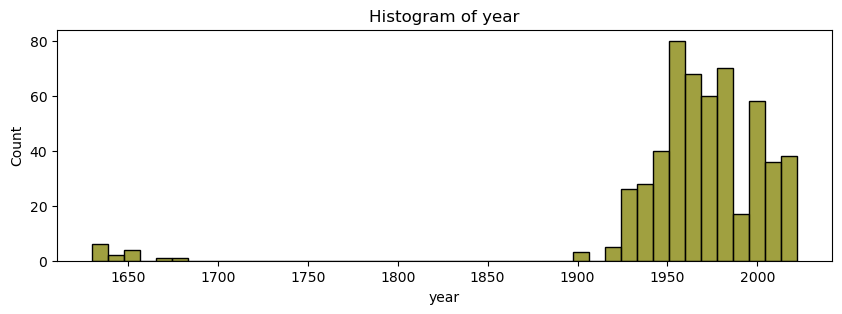

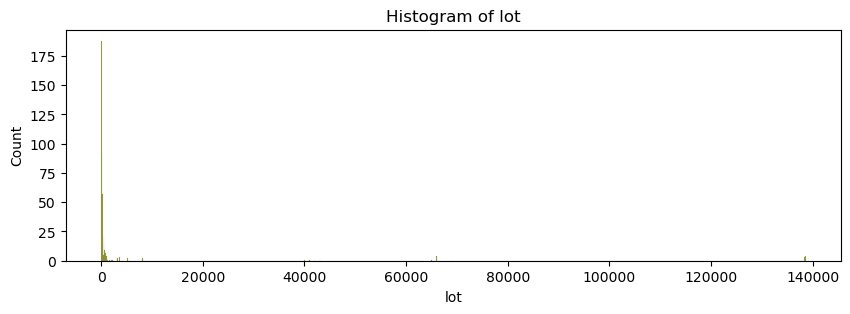

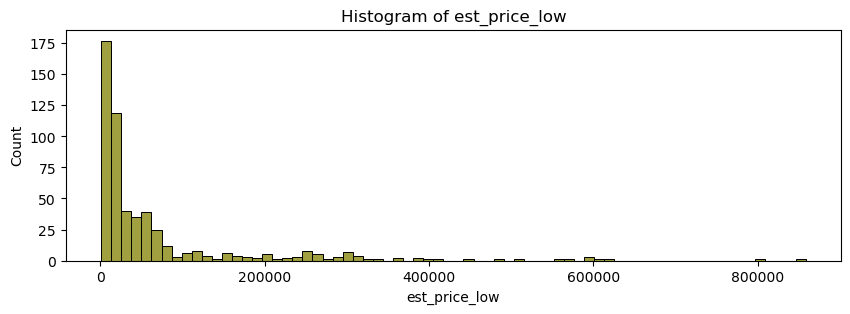

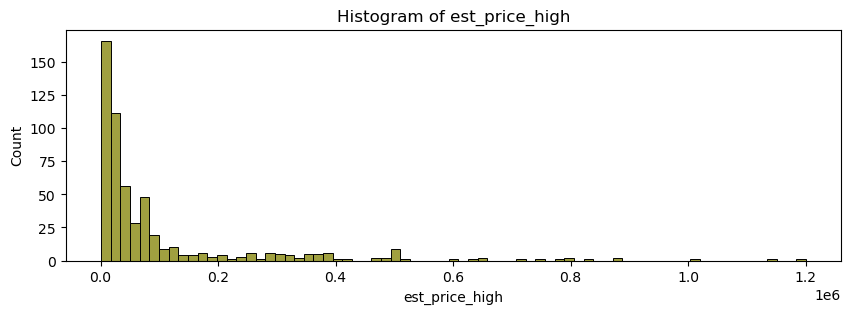

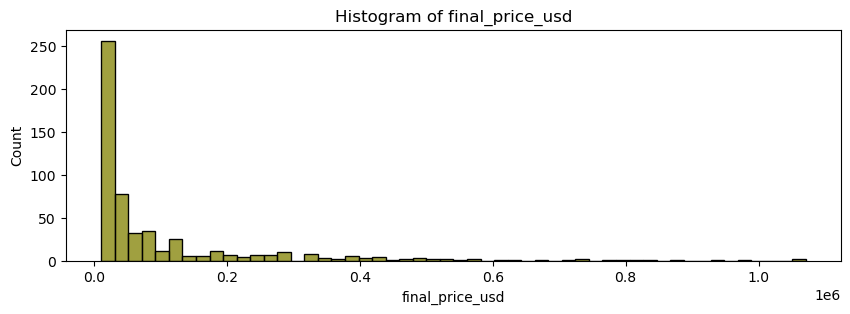

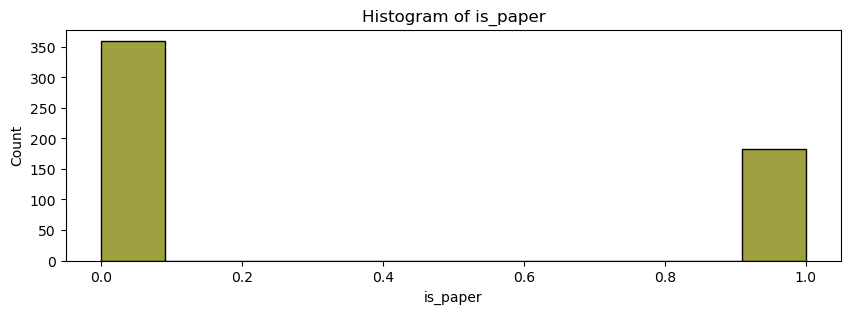

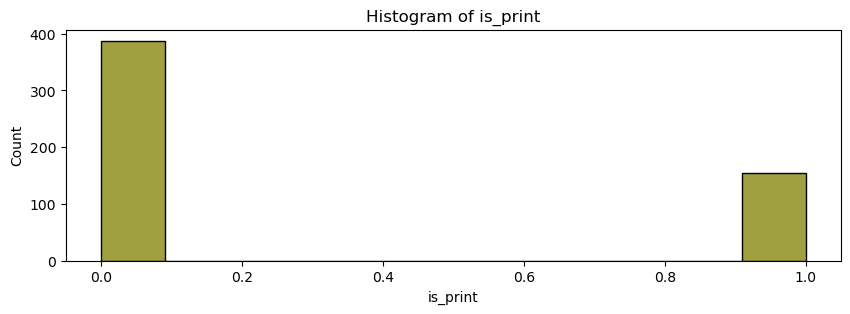

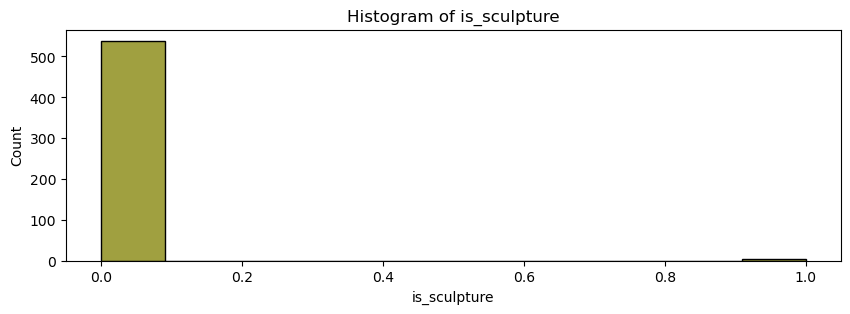

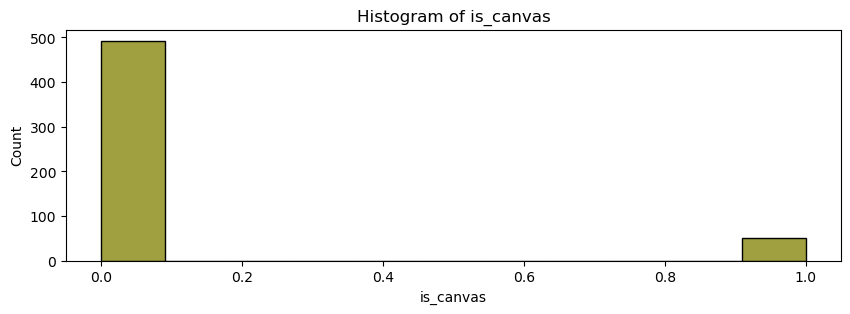

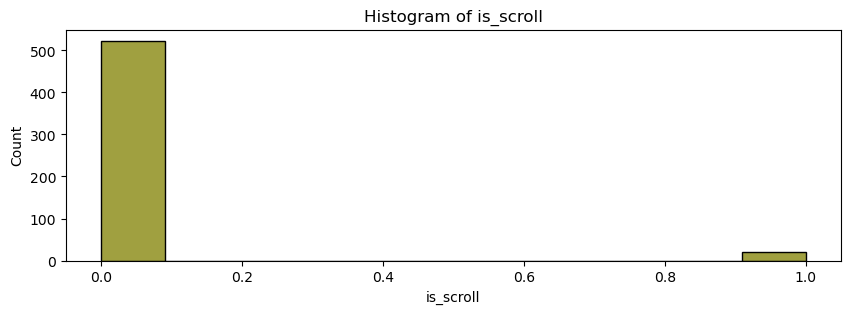

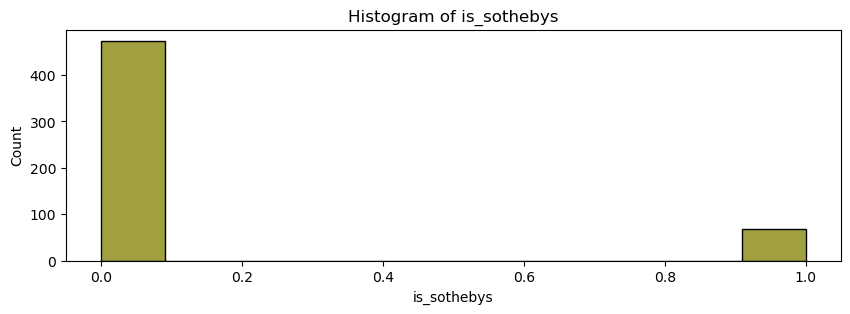

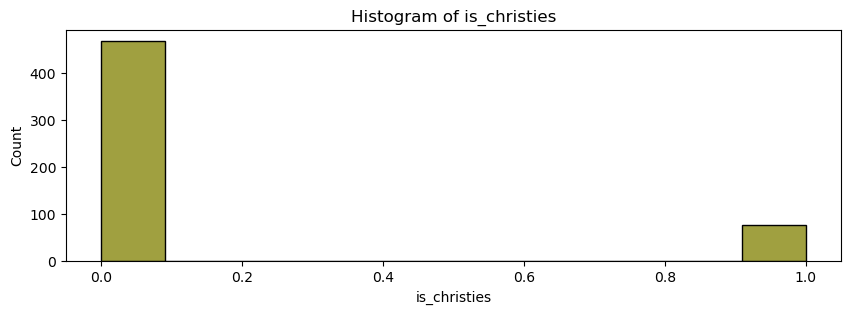

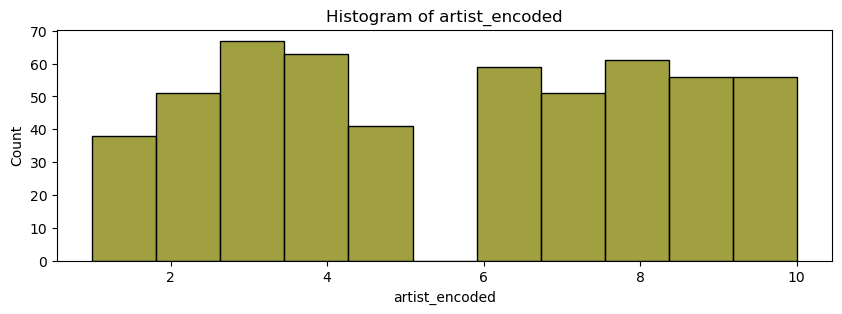

In [93]:
def display_numeric_column_histograms(data_frame):
    """
    Display histograms for numeric columns in a DataFrame with three colors.
    Args:
    - data_frame: pandas DataFrame
    Returns:
    None
    """
    numeric_columns = data_frame.select_dtypes(exclude=["object", "category"]).columns.to_list()
    # Define any number of colors for the histogram bars
    colors = ["olive"]
    for i, column in enumerate(numeric_columns):
        # Create a histogram for each numeric column with two colors
        figure, axis = plt.subplots(figsize=(10, 3))
        sns.histplot(data_frame, x=column, ax=axis, color=colors[i % len(colors)])
        axis.set_title(f"Histogram of {column}")
        plt.show()
display_numeric_column_histograms(train)

## Columns I initially suspect to be drivers of final price:
- artist
- year
- is_print
- is_sothebys
- is_christies

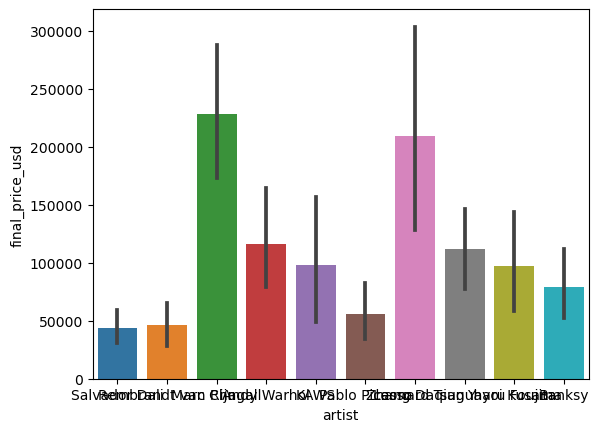

In [94]:
sns.barplot(x='artist', y='final_price_usd', data=train)
plt.show()

## Some artists seem to be more expensive than others

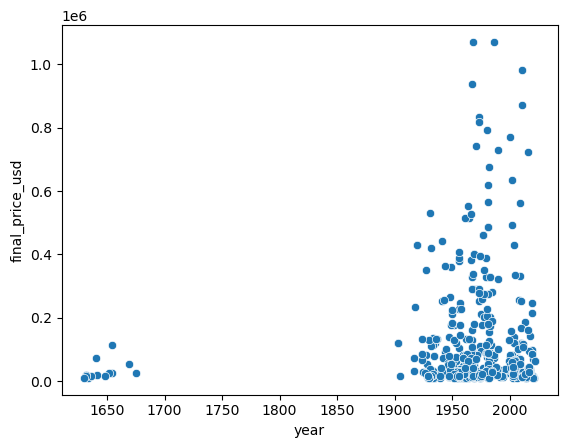

In [95]:
sns.scatterplot(x='year', y='final_price_usd', data=train)
plt.show()

## No visible correlation

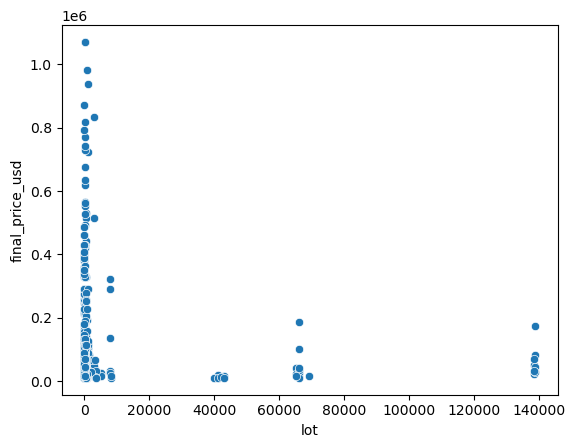

In [96]:
sns.scatterplot(x='lot', y='final_price_usd', data=train)
plt.show()

## No visible correlation

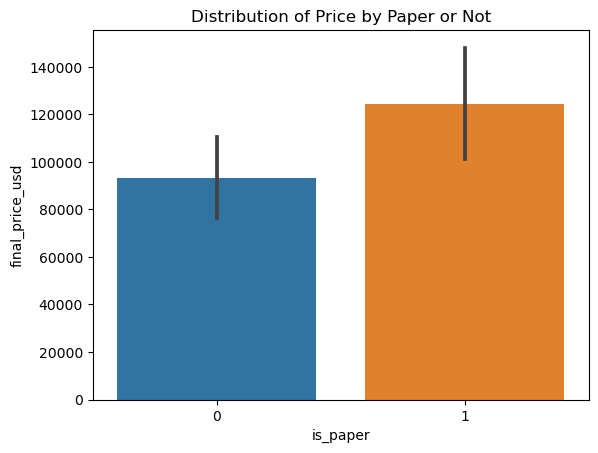

In [97]:
sns.barplot(x='is_paper', y='final_price_usd', data=train)
plt.title('Distribution of Price by Paper or Not')
plt.show()

## Paper art appears more expensive

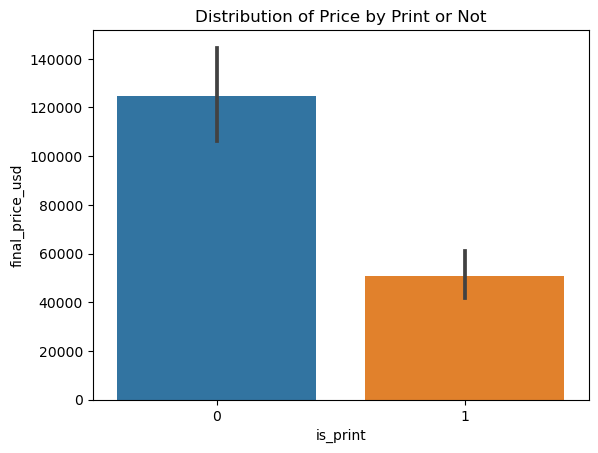

In [98]:
sns.barplot(x='is_print', y='final_price_usd', data=train)
plt.title('Distribution of Price by Print or Not')
plt.show()

## Print art seems less expensive

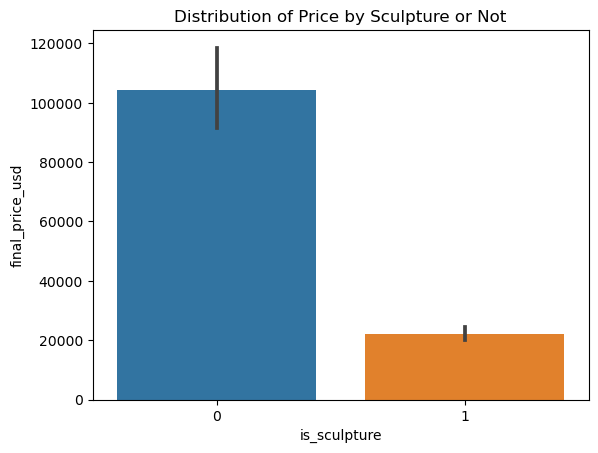

In [99]:
sns.barplot(x='is_sculpture', y='final_price_usd', data=train)
plt.title('Distribution of Price by Sculpture or Not')
plt.show()

## This seems low, but there are so few instances of sculptures

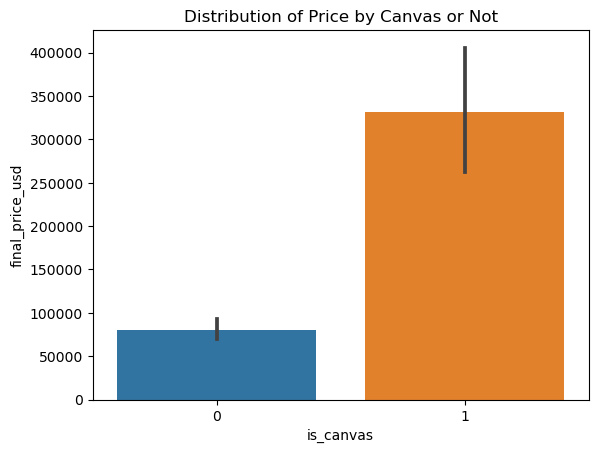

In [100]:
sns.barplot(x='is_canvas', y='final_price_usd', data=train)
plt.title('Distribution of Price by Canvas or Not')
plt.show()

## This is very high for not many canvas

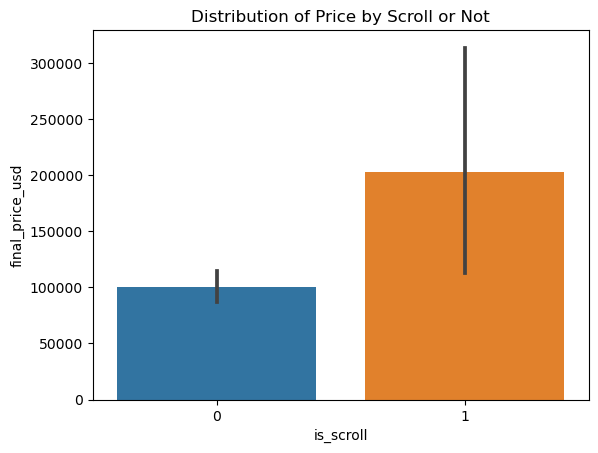

In [101]:
sns.barplot(x='is_scroll', y='final_price_usd', data=train)
plt.title('Distribution of Price by Scroll or Not')
plt.show()

## This is high as well

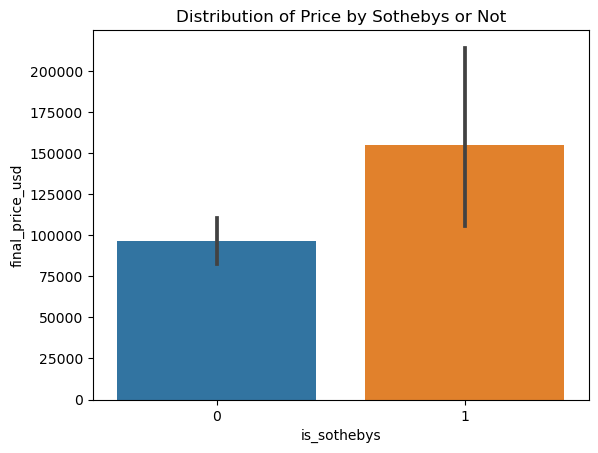

In [102]:
sns.barplot(x='is_sothebys', y='final_price_usd', data=train)
plt.title('Distribution of Price by Sothebys or Not')
plt.show()

## Sothebys seems more expensive

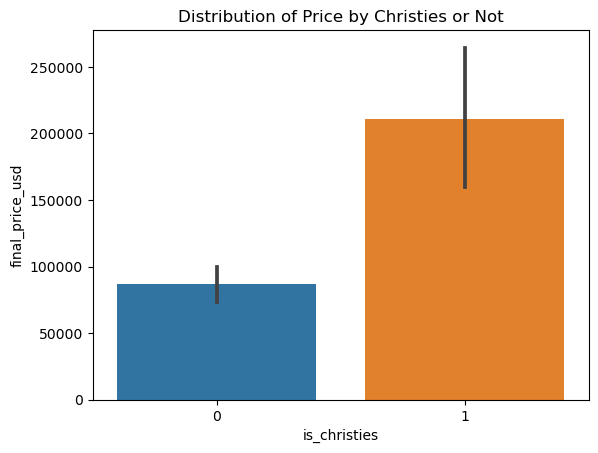

In [103]:
sns.barplot(x='is_christies', y='final_price_usd', data=train)
plt.title('Distribution of Price by Christies or Not')
plt.show()

## Christies seems more expensive

# Findings from visualizations: artist, paper, canvas, scroll, sothebys, and christies all seem like drivers of final price

## Let's move on to stats testing

In [104]:
df.columns

Index(['artist', 'title', 'dimensions', 'year', 'time_sold', 'auction', 'lot',
       'est_price_low', 'est_price_high', 'final_price_usd', 'dimensions_cm',
       'dimensions_in', 'is_paper', 'is_print', 'is_sculpture', 'is_canvas',
       'is_scroll', 'is_sothebys', 'is_christies', 'artist_encoded'],
      dtype='object')

In [105]:
alpha = .05
paper = train[train.is_paper == 1]['final_price_usd']
not_paper = train[train.is_paper != 1]['final_price_usd']
t_stat, p = stats.ttest_ind(paper, not_paper, equal_var=True)
t_stat, p

(2.047293723202219, 0.04111172164743681)

In [106]:
if p < alpha:
    print('Reject the null hypothesis. Meaning, there is an association between is_paper and final_price_usd. They are not independent.')
else:
    print('Fail to reject the null. Meaning, there is not an association between is_paper and final_price_usd. They are independent.')

Reject the null hypothesis. Meaning, there is an association between is_paper and final_price_usd. They are not independent.


In [107]:
printsss = train[train.is_print == 1]['final_price_usd']
not_prints = train[train.is_print != 1]['final_price_usd']
t_stat, p = stats.ttest_ind(printsss, not_prints, equal_var=True)
if p < alpha:
    print('Reject the null hypothesis. Meaning, there is an association between is_print and final_price_usd. They are not independent.')
else:
    print('Fail to reject the null. Meaning, there is not an association between is_print and final_price_usd. They are independent.')

Reject the null hypothesis. Meaning, there is an association between is_print and final_price_usd. They are not independent.


In [108]:
sculpture = train[train.is_sculpture == 1]['final_price_usd']
not_sculpture = train[train.is_sculpture != 1]['final_price_usd']
t_stat, p = stats.ttest_ind(sculpture, not_sculpture, equal_var=True)
if p < alpha:
    print('Reject the null hypothesis. Meaning, there is an association between is_sculpture and final_price_usd. They are not independent.')
else:
    print('Fail to reject the null. Meaning, there is not an association between is_sculpture and final_price_usd. They are independent.')

Fail to reject the null. Meaning, there is not an association between is_sculpture and final_price_usd. They are independent.


In [109]:
canvas = train[train.is_canvas == 1]['final_price_usd']
not_canvas = train[train.is_canvas != 1]['final_price_usd']
t_stat, p = stats.ttest_ind(canvas, not_canvas, equal_var=True)
if p < alpha:
    print('Reject the null hypothesis. Meaning, there is an association between is_canvas and final_price_usd. They are not independent.')
else:
    print('Fail to reject the null. Meaning, there is not an association between is_canvas and final_price_usd. They are independent.')

Reject the null hypothesis. Meaning, there is an association between is_canvas and final_price_usd. They are not independent.


In [110]:
scroll = train[train.is_scroll == 1]['final_price_usd']
not_scroll = train[train.is_scroll != 1]['final_price_usd']
t_stat, p = stats.ttest_ind(scroll, not_scroll, equal_var=True)
if p < alpha:
    print('Reject the null hypothesis. Meaning, there is an association between is_scroll and final_price_usd. They are not independent.')
else:
    print('Fail to reject the null. Meaning, there is not an association between is_scroll and final_price_usd. They are independent.')

Reject the null hypothesis. Meaning, there is an association between is_scroll and final_price_usd. They are not independent.


In [111]:
soth = train[train.is_sothebys == 1]['final_price_usd']
not_soth = train[train.is_sothebys != 1]['final_price_usd']
t_stat, p = stats.ttest_ind(soth, not_soth, equal_var=True)
if p < alpha:
    print('Reject the null hypothesis. Meaning, there is an association between is_sothebys and final_price_usd. They are not independent.')
else:
    print('Fail to reject the null. Meaning, there is not an association between is_sothebys and final_price_usd. They are independent.')

Reject the null hypothesis. Meaning, there is an association between is_sothebys and final_price_usd. They are not independent.


In [112]:
chr = train[train.is_christies == 1]['final_price_usd']
not_chr = train[train.is_christies != 1]['final_price_usd']
t_stat, p = stats.ttest_ind(chr, not_chr, equal_var=True)
if p < alpha:
    print('Reject the null hypothesis. Meaning, there is an association between is_christies and final_price_usd. They are not independent.')
else:
    print('Fail to reject the null. Meaning, there is not an association between is_christies and final_price_usd. They are independent.')

Reject the null hypothesis. Meaning, there is an association between is_christies and final_price_usd. They are not independent.


In [113]:
observed = pd.crosstab(train['artist'], train['final_price_usd'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis. Meaning, there is an association between artist and final_price_usd. They are not independent.')
else:
    print('Fail to reject the null. Meaning, there is not an association between artist and final_price_usd. They are independent.')

Reject the null hypothesis. Meaning, there is an association between artist and final_price_usd. They are not independent.


In [114]:
observed = pd.crosstab(train['year'], train['final_price_usd'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis. Meaning, there is an association between year and final_price_usd. They are not independent.')
else:
    print('Fail to reject the null. Meaning, there is not an association between year and final_price_usd. They are independent.')

Reject the null hypothesis. Meaning, there is an association between year and final_price_usd. They are not independent.


In [115]:
observed = pd.crosstab(train['lot'], train['final_price_usd'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
if p < alpha:
    print('Reject the null hypothesis. Meaning, there is an association between lot and final_price_usd. They are not independent.')
else:
    print('Fail to reject the null. Meaning, there is not an association between lot and final_price_usd. They are independent.')

Reject the null hypothesis. Meaning, there is an association between lot and final_price_usd. They are not independent.


## Findings from stats testing: paper, print, canvas, scroll, sothebys, christies, artist, year, and lot are all drivers of final price

## Let's look at which mediums different artists use

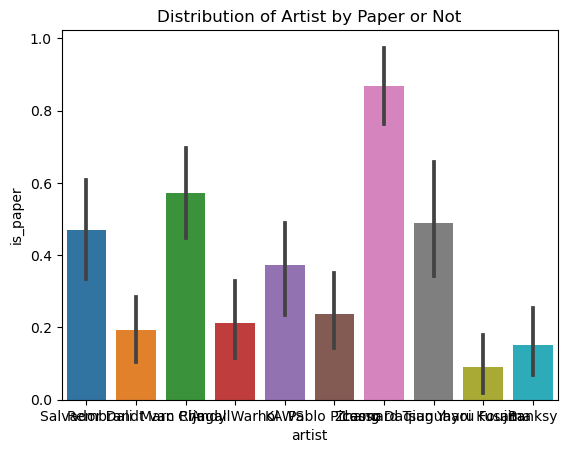

In [116]:
sns.barplot(x='artist', y='is_paper', data=train)
plt.title('Distribution of Artist by Paper or Not')
plt.show()

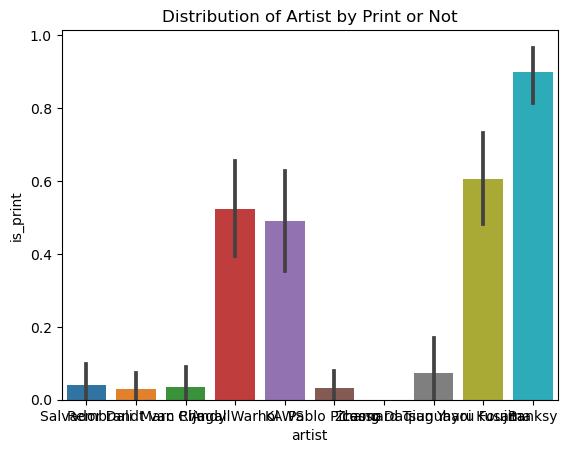

In [117]:
sns.barplot(x='artist', y='is_print', data=train)
plt.title('Distribution of Artist by Print or Not')
plt.show()

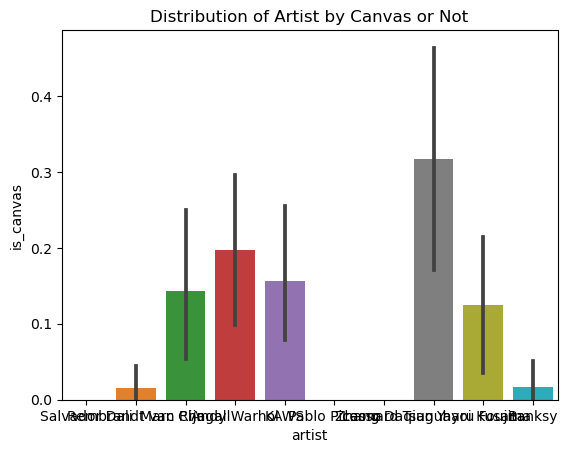

In [118]:
sns.barplot(x='artist', y='is_canvas', data=train)
plt.title('Distribution of Artist by Canvas or Not')
plt.show()

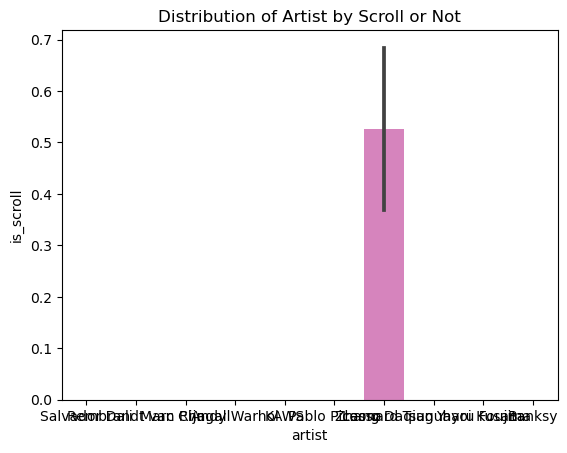

In [119]:
sns.barplot(x='artist', y='is_scroll', data=train)
plt.title('Distribution of Artist by Scroll or Not')
plt.show()

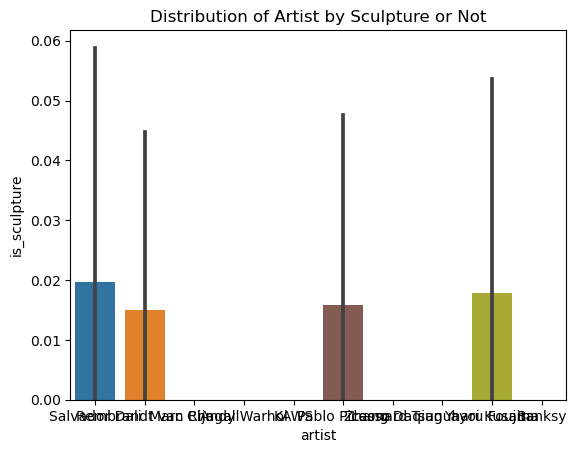

In [120]:
sns.barplot(x='artist', y='is_sculpture', data=train)
plt.title('Distribution of Artist by Sculpture or Not')
plt.show()

## It looks like paper is used by all these artists, but the other mediums are specific to a few artists or even just one

# Modeling

## Baseline is 41% (current art appraisers)

In [121]:
train.columns

Index(['artist', 'title', 'dimensions', 'year', 'time_sold', 'auction', 'lot',
       'est_price_low', 'est_price_high', 'final_price_usd', 'dimensions_cm',
       'dimensions_in', 'is_paper', 'is_print', 'is_sculpture', 'is_canvas',
       'is_scroll', 'is_sothebys', 'is_christies', 'artist_encoded'],
      dtype='object')

In [124]:
X_train = train.drop(columns=['artist', 'title', 'dimensions', 'time_sold', 'auction', 'est_price_low', 'est_price_high', 'final_price_usd', 'dimensions_cm', 'dimensions_in'])
y_train = train.final_price_usd

X_val = validate.drop(columns=['artist', 'title', 'dimensions', 'time_sold', 'auction', 'est_price_low', 'est_price_high', 'final_price_usd', 'dimensions_cm', 'dimensions_in'])
y_val = validate.final_price_usd

X_test = test.drop(columns=['artist', 'title', 'dimensions', 'time_sold', 'auction', 'est_price_low', 'est_price_high', 'final_price_usd', 'dimensions_cm', 'dimensions_in'])
y_test = test.final_price_usd

## Linear Regression

In [126]:
# Intial ML model
lr1 = LinearRegression()

# Make it
rfe = RFE(lr1, n_features_to_select=1)

# Fit it
rfe.fit(X_train, y_train)

# Use it on train
X_train_rfe = rfe.transform(X_train)

# Use it on validate
X_val_rfe = rfe.transform(X_val)

In [127]:
# Fit the thing
lr1.fit(X_train_rfe, y_train)

# Use the thing (make predictions)
pred_lr1 = lr1.predict(X_train_rfe)
pred_val_lr1 = lr1.predict(X_val_rfe)

In [129]:
def metrics_reg(y, yhat):
    """
    send in y_true, y_pred & returns RMSE, R2
    """
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [130]:
# Train
metrics_reg(y_train, pred_lr1)

(149941.47504364798, 0.18902956350084255)

In [131]:
# Validate
rmse, r2 = metrics_reg(y_val, pred_val_lr1)
rmse, r2

(133380.40142459242, 0.19366306303787062)

In [132]:
metrics_df = pd.DataFrame(data=[
    {
        'model':'rfe',
        'rmse':rmse,
        'r2':r2
    }
    
])
metrics_df

,model,rmse,r2
0,linreg,133380.401425,0.193663


## Polynomial Regression

In [134]:
# Make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# Fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# Transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_val)
X_test_degree2 = pf.transform(X_test)

In [135]:
# Make it
pr = LinearRegression()

# Fit it
pr.fit(X_train_degree2, y_train)

# Use it
pred_pr = pr.predict(X_train_degree2)
pred_val_pr = pr.predict(X_validate_degree2)

In [136]:
# Train
metrics_reg(y_train, pred_pr)

(122232.59486509147, 0.46106606868361466)

In [138]:
# Validate
rmse, r2 = metrics_reg(y_val, pred_val_pr)
rmse, r2

(137418.9185334492, 0.144094992883105)

In [139]:
# Add to my metrics df
metrics_df.loc[1] = ['poly2', rmse, r2]
metrics_df

,model,rmse,r2
0,linreg,133380.401425,0.193663
1,poly2,137418.918533,0.144095


## Tweedie Regression

In [140]:
# Make it
glm = TweedieRegressor(power=0, alpha=0)

# Fit it
glm.fit(X_train, y_train)

# Use it
pred_glm = glm.predict(X_train)
pred_val_glm = glm.predict(X_val)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [142]:
# Train
metrics_reg(y_train, pred_glm)

(140223.48323974208, 0.29074408420562836)

In [144]:
# Validate
rmse, r2 = metrics_reg(y_val, pred_val_glm)
rmse, r2

(126691.12696771957, 0.27251354266567507)

In [145]:
# Add to my metrics df
metrics_df.loc[2] = ['tweedie',rmse,r2]
metrics_df

,model,rmse,r2
0,linreg,133380.401425,0.193663
1,poly2,137418.918533,0.144095
2,tweedie,126691.126968,0.272514


## Lassolars

In [147]:
#make it
lars = LassoLars(alpha=1)

#fit it
lars.fit(X_train, y_train)

#use it
pred_lars = lars.predict(X_train)
pred_val_lars = lars.predict(X_val)

In [148]:
#train
metrics_reg(y_train, pred_lars)

(138630.79077630237, 0.30676438607062473)

In [149]:
#validate
rmse, r2 = metrics_reg(y_val, pred_val_lars)
rmse, r2

(125755.37756856433, 0.28322038562724383)

In [150]:
#add to my metrics df
metrics_df.loc[3] = ['lars', rmse, r2]
metrics_df

,model,rmse,r2
0,linreg,133380.401425,0.193663
1,poly2,137418.918533,0.144095
2,tweedie,126691.126968,0.272514
3,lars,125755.377569,0.283220


## Lasso Lars has the lowest error so we will use it on test

In [152]:
# use it
pred_test = lars.predict(X_test)
pred_test

array([ 38376.6874457 , 297816.72549563,  46080.94058755,  93934.25135328,
        76460.9103559 ,  29429.53152695, 167562.3795505 ,  83439.34927003,
        24834.68053246, 140921.09648814,  36629.67557916, 273821.83078284,
        84559.34266651,  44228.48756009,  48710.79293716,  89026.30895213,
        76251.86308267, 144367.34830421,  46517.33264333,  42079.24288021,
       127557.04549401,  31676.1927587 ,  71995.46659643, 140297.41121479,
        86657.78612066,  54672.4420645 , 115188.573506  , 383498.71918491,
        39525.95522116,  91613.16308844,  38152.34679562,  98943.76269136,
        92733.28877217, 307599.11765874,  91685.42909295,  86419.3771619 ,
        24486.79709828,  31498.15634038,  84837.55285155,  33098.80933114,
        44706.49588667,  94047.42818292,  91577.52615188,  66401.46641396,
        35258.53546941,  84303.64834676,  24473.04476265, 125694.6080237 ,
       393165.97297523,  77149.52705318,  80940.6097499 , 387639.47507979,
        86233.85496411,  

In [153]:
rmse, r2 = metrics_reg(y_test, pred_test)
rmse, r2

(108356.63728381055, 0.21878416357635444)

## Lassolars has a low rmse on test (108k) for our prices ranging from 10k to 1 million

# Main takeaways: 
- The biggest drivers of final price are paper, print, canvas, scroll, sothebys, christies, artist, year, and lot
- We can predict final price with 21% accuracy on test data with a lassolars model using these features, which is lower than baseline (art appraisers giving a range of prices)
# If we have more time: 
- Engineer more columns for higher accuracy
- Find how often art appraisers predict exactly correctly or find a way to make a range of predicted prices